# 3D Sinusoidal Data using Artificial Neural Networks

### Overview

Utilized artificial neural networks to solve regression issues by fitting a neural network to a noisy 3D sinusoidal data set using a Sequential model. Used matplotlib to display the data points and prediction curve.

**Tasks:**
1. Build Plot Functions
2. Split and Standardize
3. Plot Data
4. Fit Sequential Model
5. Plot Data with Prediction Curve
6. Compute Error

**File Used:**

3DSinusoidalANN.csv - all data points

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot3Ddata(data_df):
    fig = plt.figure(figsize=[18, 10])

    ax = fig.add_subplot(2, 2, 1, projection='3d')
    ax.view_init(0, 89)
    ax.scatter3D(data_df['x'], data_df['y'], data_df['z']);
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.axes.set_xlim3d(left=-1.5, right=1.5)

    ax = fig.add_subplot(2, 2, 2, projection='3d')
    ax.view_init(45, 0)
    ax.scatter3D(data_df['x'], data_df['y'], data_df['z']);
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.axes.set_ylim3d(bottom=-1.5, top=1.5) 
    
    ax = fig.add_subplot(2, 2, 3, projection='3d')
    ax.view_init(45, 90)
    ax.scatter3D(data_df['x'], data_df['y'], data_df['z']);
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z') 

    ax = fig.add_subplot(2, 2, 4, projection='3d')
    ax.view_init(90, -90)
    ax.scatter3D(data_df['x'], data_df['y'], data_df['z']);
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.axes.set_xlim3d(left=1.5, right=-1.5)
    ax.axes.set_ylim3d(bottom=1.5, top=-1.5) 
    
    plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
    plt.show()


def plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z):
    fig = plt.figure(figsize=[18, 10])
    ax = fig.add_subplot(2, 2, 1, projection='3d')
    ax.view_init(0, 89)
    ax.scatter3D(scat_x, scat_y, scat_z);
    ax.plot3D(fit_x, fit_y, fit_z, '-k');
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.axes.set_xlim3d(left=-1.5, right=1.5)
    
    ax = fig.add_subplot(2, 2, 2, projection='3d')
    ax.view_init(45, 0)
    ax.scatter3D(scat_x, scat_y, scat_z);
    ax.plot3D(fit_x, fit_y, fit_z, '-k');
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.axes.set_ylim3d(bottom=-1.5, top=1.5) 
    
    ax = fig.add_subplot(2, 2, 3, projection='3d')
    ax.view_init(45, 90)
    ax.scatter3D(scat_x, scat_y, scat_z);
    ax.plot3D(fit_x, fit_y, fit_z, '-k');
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax = fig.add_subplot(2, 2, 4, projection='3d')
    ax.view_init(90, -90)
    ax.scatter3D(scat_x, scat_y, scat_z);
    ax.plot3D(fit_x, fit_y, fit_z, '-k');
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.axes.set_xlim3d(left=1.5, right=-1.5)
    ax.axes.set_ylim3d(bottom=1.5, top=-1.5) 

    plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
    plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('3DSinusoidalANN.csv')
X = data[['x','z']]
y = data['y']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.fit_transform(y_test.values.reshape(-1,1))

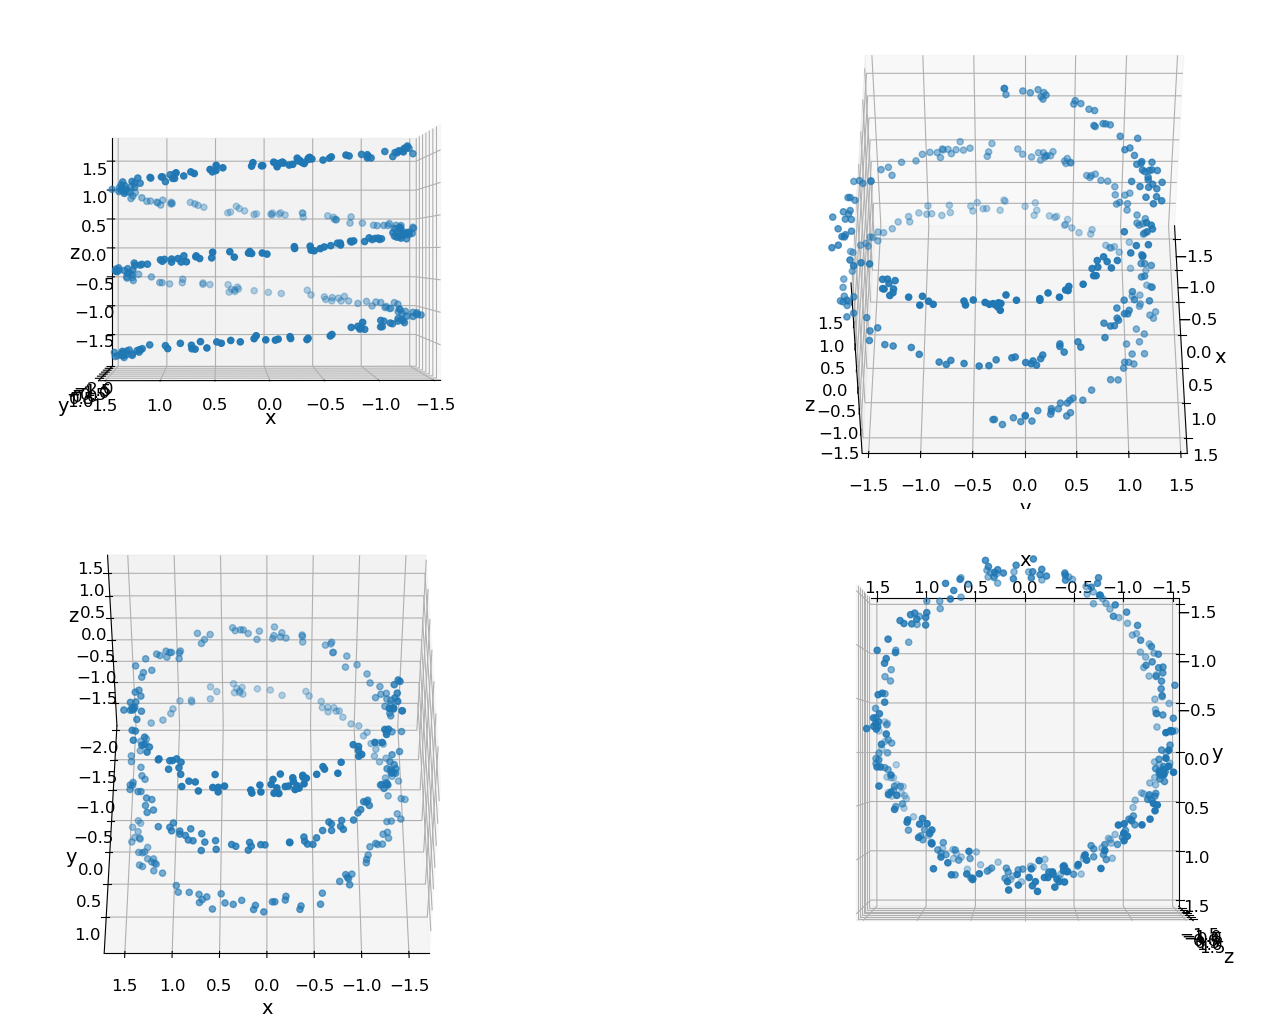

In [11]:
train_df = pd.DataFrame({'x':X_train[:,0],'y':y_train[:,0],'z':X_train[:,1]})
plot3Ddata(train_df)

In [13]:
import tensorflow as fl
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(19, activation="relu", kernel_regularizer=keras.regularizers.l2(.001)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=.15))
history = model.fit(X_train, y_train, epochs=250, validation_data=(X_valid, y_valid))

Epoch 1/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 1.0444 - val_loss: 10.9071
Epoch 2/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.9253 - val_loss: 10.6694
Epoch 3/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9487 - val_loss: 10.6059
Epoch 4/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8441 - val_loss: 10.3455
Epoch 5/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8744 - val_loss: 10.3803
Epoch 6/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9179 - val_loss: 10.3692
Epoch 7/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8188 - val_loss: 10.1771
Epoch 8/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8700 - val_loss: 10.1183
Epoch 9/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8209 - val_loss: 9.6977
Epoch 10/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8580 - val_loss: 9.9464
Epoch 11/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7487 - val_loss: 9.7637
Epoch 12/250
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms

In [15]:
scat_x = np.array(X_train[:,0]).reshape(-1,1)
scat_y = np.array(y_train)
scat_z = np.array(X_train[:,1]).reshape(-1,1)
fit_x = scat_x
fit_y = model.predict(X_train)
fit_z = scat_z
sorted = pd.DataFrame(
        {'x':list(scat_x),
        'y':list(scat_y),
        'z':list(scat_z),
        'y_preds':list(fit_y)})
sorted = sorted.sort_values(by=['z'])

fit_x = sorted['x']
fit_y = sorted['y_preds']
fit_z = sorted['z']

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


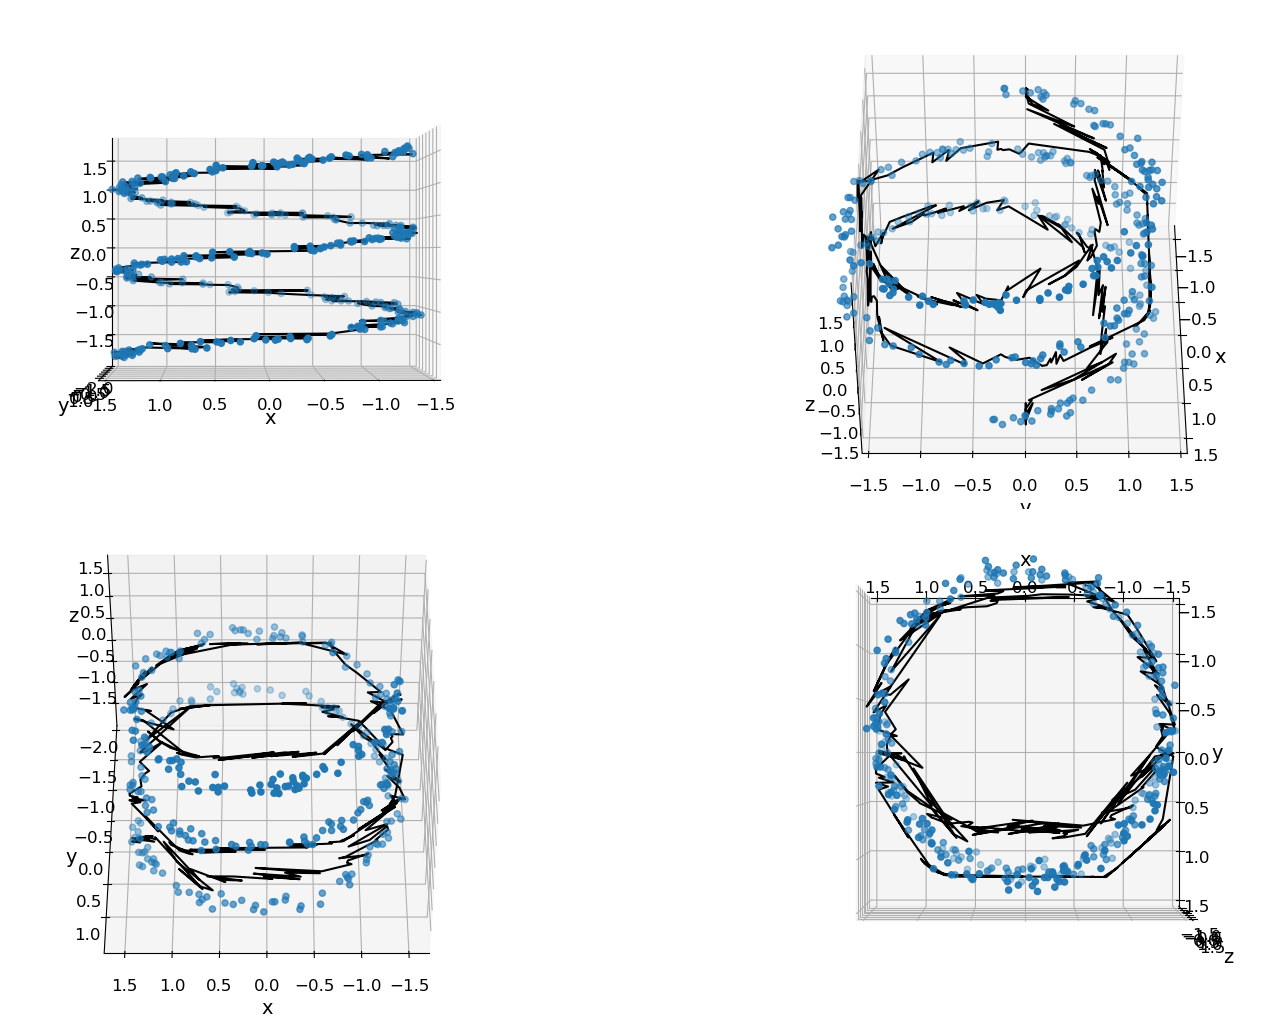

In [16]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

In [17]:
from sklearn.metrics import mean_squared_error

gen = round(model.evaluate(X_test, y_test, verbose = 0),4)
mse_test = round(model.evaluate(X_test, y_test),4)

print("Generalization Error: ", gen)
print("Mean Squared Error: ", mse_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3221 
Generalization Error:  0.3563
Mean Squared Error:  0.3563
